#**THỰC HÀNH PHÂN LỚP NAÏVE BAYES**

**Câu 1: Toy example – Phân loại hoa Iris bằng Naïve Bayes**

Số mẫu: 150
Số đặc trưng: 4
Các lớp: ['setosa' 'versicolor' 'virginica']

Độ chính xác Naïve Bayes trên Iris: 96.67%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



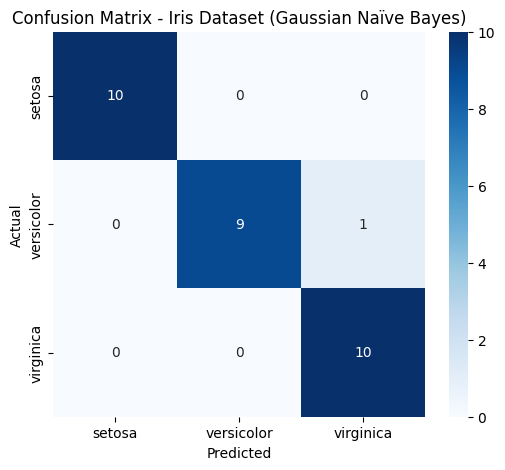

In [1]:
# CÂU 1: Naïve Bayes trên Iris dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB   # Vì đặc trưng của Iris là số thực (continuous)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dữ liệu Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("Số mẫu:", X.shape[0])
print("Số đặc trưng:", X.shape[1])
print("Các lớp:", iris.target_names)

# Chia train/test 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Huấn luyện Gaussian Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Dự đoán
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác Naïve Bayes trên Iris: {acc*100:.2f}%")

# Báo cáo chi tiết
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Iris Dataset (Gaussian Naïve Bayes)')
plt.show()

**Câu 2: Nhận dạng chữ cái (Letter Recognition) bằng Naïve Bayes**

In [2]:
# CÂU 2: Letter Recognition (A-Z) bằng Naïve Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler  # Để thử MultinomialNB (yêu cầu giá trị không âm)
import warnings
warnings.filterwarnings('ignore')

# Load dữ liệu trực tiếp từ UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter'] + [f'f{i}' for i in range(16)]
df = pd.read_csv(url, header=None, names=columns)

print("Shape:", df.shape)      # (20000, 17)
print("Một vài mẫu:")
print(df.head())

X = df.drop('letter', axis=1)
y = df['letter']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 1. Gaussian Naïve Bayes (thường tốt hơn cho dataset này)
print("\n=== Gaussian Naïve Bayes ===")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_g = gnb.predict(X_test)
acc_g = accuracy_score(y_test, y_pred_g)
print(f"GaussianNB  → Accuracy: {acc_g*100:.2f}%")

# 2. Multinomial Naïve Bayes (cần scale về [0,1] hoặc giữ nguyên vì giá trị đã >=0)
print("\n=== Multinomial Naïve Bayes ===")
# Vì dữ liệu đã là số nguyên >=0 nên có thể dùng trực tiếp
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_m = mnb.predict(X_test)
acc_m = accuracy_score(y_test, y_pred_m)
print(f"MultinomialNB → Accuracy: {acc_m*100:.2f}%")

# (Tùy chọn) Dùng scaler để cải thiện MultinomialNB một chút
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mnb2 = MultinomialNB()
mnb2.fit(X_train_scaled, y_train)
acc_m2 = mnb2.score(X_test_scaled, y_test)
print(f"MultinomialNB (scaled) → Accuracy: {acc_m2*100:.2f}%")

Shape: (20000, 17)
Một vài mẫu:
  letter  f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  f10  f11  f12  f13  f14  f15
0      T   2   8   3   5   1   8  13   0   6   6   10    8    0    8    0    8
1      I   5  12   3   7   2  10   5   5   4  13    3    9    2    8    4   10
2      D   4  11   6   8   6  10   6   2   6  10    3    7    3    7    3    9
3      N   7  11   6   6   3   5   9   4   6   4    4   10    6   10    2    8
4      G   2   1   3   1   1   8   6   6   6   6    5    9    1    7    5   10
Train: (15000, 16), Test: (5000, 16)

=== Gaussian Naïve Bayes ===
GaussianNB  → Accuracy: 65.06%

=== Multinomial Naïve Bayes ===
MultinomialNB → Accuracy: 55.48%
MultinomialNB (scaled) → Accuracy: 52.14%
